In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from scipy.spatial import Voronoi, voronoi_plot_2d
%matplotlib inline 

pd.set_option('display.max_rows', 500)

# Визуальный анализ рейтингов шоу Netflix

---


<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



### Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA.
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей.

In [ ]:
'''
комментарий Telrielnor:
df = датасет без дубликатов
df1 = датасет с отбрасываением дублей и пустых значений в rating description ЛИБО user rating score - не нужен имхо
df2 = датасет с отбрасыванием дублей и пустых значений если оба rating description И user rating score пусты (скорее всего тоже не нужно, но поскольку юзал его везде, изменим df2=df)
df3 = df2 с отбрасыванием значений по годам до treshold (1985) года
df4 = df2 c порогом 1998

Имеет смысл дублирующиеся названия шоу типа звездных войн совместить. (КАК?)
'''

'\nкомментарий Telrielnor:\ndf = датасет без дубликатов\ndf1 = датасет с отбрасываением дублей и пустых значений в rating description ЛИБО user rating score - не нужен имхо\ndf2 = датасет с отбрасыванием дублей и пустых значений если оба rating description И user rating score пусты (скорее всего тоже не нужно, но поскольку юзал его везде, изменим df2=df)\ndf3 = df2 с отбрасыванием значений по годам до treshold (1985) года\ndf4 = df2 c порогом 1998\n\nИмеет смысл дублирующиеся названия шоу типа звездных войн совместить. (КАК?)\n'

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на дополнительном занятии.  
Ссылка на шаблон к презентации: лежит рядом с заданием в классруме.  
Вы можете менять оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода или злоупотреблять скринами блокнота не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверять ваш код, визуализацию и выводы. 

### Вопросы, на которые нужно ответить в презентации: 
- Сколько рейтинговых групп представлено в данных?
- Какие оценки пользователи ставят чаще всего?
- Какие оценки пользователи ставят в среднем?
- В какие годы были запущены шоу?
- Можно ли сделать вывод, что 2017 год успешнее для Netflix?
- В каких рейтинговых группах запущены шоу на Netflix?
- Выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы из презентации и сопроводить выводы релевантной визуализацией. 

Любой хороший Data Scientist должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

### Полезные замечания и советы
- Следите за тем, чтобы все графики на слайдах можно было прочитать даже без ваших комментариев;
- Не нужно делать просто текстовые слайды;
- Не обязательно ограничиваться представленным датасетом. У вас есть весь интернет, чтобы найти дополнительную информацию и проверить ваши гипотезы. Дерзайте!


## Решение

Скачайте данные: они лежат рядом с этим файлом в классруме. 
Загрузите данные, выполнив код ниже.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving NetflixShows.csv to NetflixShows.csv


In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [5]:
data = pd.read_csv("NetflixShows.csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

NameError: ignored

In [ ]:
#смотрим размерность датасета
data.shape

(1000, 5)

In [ ]:
#количество уникальных значений
data.nunique()

title                496
rating                13
ratingLevel           99
release year          35
user rating score     42
dtype: int64

In [ ]:
#количество пустых значений
data.isnull().sum()

title                  0
rating                 0
ratingLevel           59
release year           0
user rating score    395
dtype: int64

In [ ]:
#статистика по чисельным столбцам
data.describe()

,release year,user rating score
count,1000.000000,605.000000
mean,2010.335000,84.094215
std,8.877927,12.344371
min,1940.000000,55.000000
25%,2007.000000,75.000000
50%,2015.000000,88.000000
75%,2016.000000,95.000000
max,2017.000000,99.000000


In [ ]:
#Какие колонки в датасете
data.columns

Index(['title', 'rating', 'ratingLevel', 'release year', 'user rating score'], dtype='object')

In [ ]:
#иформация по колонкам и типом данных в них, сколько ненулевых значений из общего числа
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1000 non-null   object 
 1   rating             1000 non-null   object 
 2   ratingLevel        941 non-null    object 
 3   release year       1000 non-null   int64  
 4   user rating score  605 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
# последние 10 значений
data.tail(10)

,title,rating,ratingLevel,release year,user rating score
990,My Animal Friends,TV-Y,Suitable for all ages.,2013,NaN
991,Dawn of the Croods,TV-Y7,Suitable for children ages 7 and older,2017,72.0
992,Alpha and Omega: Dino Digs,TV-G,Suitable for all ages.,2016,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
995,The BFG,PG,"for action/peril, some scary moments and brief...",2016,97.0
996,The Secret Life of Pets,PG,for action and some rude humor,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN
998,Beary Tales,TV-G,Suitable for all ages.,2013,NaN
999,Growing Up Wild,G,NaN,2016,80.0


In [ ]:
#первые 10 значений
data.head(10)

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
5,Supernatural,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,95.0
6,Breaking Bad,TV-MA,For mature audiences. May not be suitable for...,2013,97.0
7,The Vampire Diaries,TV-14,Parents strongly cautioned. May be unsuitable ...,2017,91.0
8,The Walking Dead,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
9,Pretty Little Liars,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,96.0


In [ ]:
#создаем три датасета. df - дропнули полные дубликаты и конвертировали rs в флоат, df1 - дропнули ряды с пропусками в rl ЛИБО rs  df2 - дропнули ряды с пропусками в rs И rl

df = data.drop_duplicates()
df['user rating score'] = df['user rating score'].astype(float)
df1 = df.dropna(subset=['ratingLevel','user rating score'])#, how = 'all')
df2 = df.dropna(subset=['ratingLevel','user rating score'], how = 'all')


print(df.shape)

(500, 5)


<ipython-input-18-bb360f2cfff2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user rating score'] = df['user rating score'].astype(float)


In [ ]:
#Задали два порога отбраковки выброса и отредактировали датасеты - df3 - 1985 год(дроп 5 значений) и df4 -  1998 (34 значения)
treshold = 1985
treshold2 = 1998

df2=df

#len(df2.loc[(df2['release year'] <= treshold)])
df3 = df2.drop(df2[df2['release year'] <= treshold].index)
df4 = df2.drop(df2[df2['release year'] <= treshold2].index)

<AxesSubplot:>

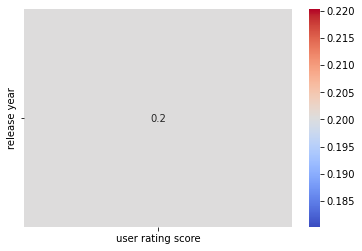

In [ ]:
#проверяем корреляцию rs и остальных чисельных столбоцов (только год по сути)
corrme = df.corr()['user rating score'].drop('user rating score')
sns.heatmap(corrme.to_frame(), annot=True, cmap='coolwarm')

In [ ]:
#as we can see there is no correlation between a year and user rating
# корреляция 20% по сути ниачом

<AxesSubplot:>

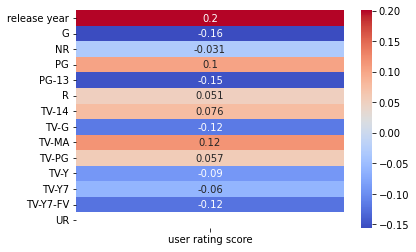

In [ ]:
#let's build a one-hot encoded matrix
# конвертируем с помощью one-hot encoding рейтинги жесткости и проверяем корреляцию с рейтингов пользователей
№
ratings = pd.get_dummies(df['rating'])
ratings_w = pd.concat([df[['user rating score', 'release year']], ratings], axis = 1)
corrme = ratings_w.corr()['user rating score'].drop('user rating score')
sns.heatmap(corrme.to_frame(), annot=True, cmap='coolwarm')

In [ ]:
#and again, no correlation betweer PG rating a movie rating
#не обнаружено

<AxesSubplot:>

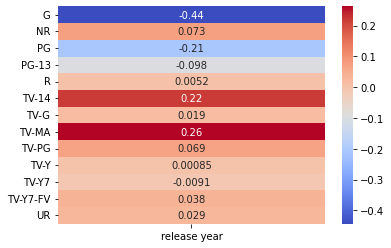

In [ ]:
#ради лулзов проверям корреляцию количества фильмов по рейтингу жесткости с годом выхода
ratings_y = pd.concat([df['release year'], ratings], axis = 1)
corrme = ratings_y.corr()['release year'].drop('release year')
sns.heatmap(corrme.to_frame(), annot=True, cmap = 'coolwarm')

In [ ]:
#Only weak correlation is that the further we go the less G rating movies we get - 44% correlation
# слабая отрицательная .44 корреляция между годом и рейтингом G - видим, что чем дальше по годам тем меньше таких фильмов снимают

### Удалите из данных дубликаты. 
- Почему они возникли?
- Много ли их? В каких группах их больше всего?

In [ ]:
#смотрим сколько дублей убрано
data.shape[0] - df2.shape[0]

500

In [ ]:
'''после удаления дублей остаются несколько значений с теми же именами в колонке названия фильма
как видим, у нас есть несколько вариантов:
1. разные фильмы с тем же названием но разные годы выпуска - Goosebumps
2. неверно введенные данные об одном и том же фильме -рейтинг жесткости и оценки другие, но фильм тот же - Bordertown
3. Одно и то же шоу, но разные сезоны с разным рейтингом и в некоторых случаях уровнем жесткости - Skins, Star Wars:The Clone Wars
ВНИМАНИЕ: в последнем случае можно фильмы объединить и высчитать среднее
'''
a = df[df['title'].duplicated() != df.duplicated()]['title']
result = df.loc[df['title'].isin(a)]
result.sort_values(by='title')


,title,rating,ratingLevel,release year,user rating score
167,Bordertown,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,86.0
449,Bordertown,TV-MA,For mature audiences. May not be suitable for...,2016,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
632,Goosebumps,PG,"scary and intense creature action and images, ...",2015,90.0
151,Skins,TV-MA,For mature audiences. May not be suitable for...,2013,NaN
181,Skins,TV-MA,NaN,2017,NaN
504,Star Wars: The Clone Wars,PG,"sci-fi action violence throughout, brief langu...",2008,57.0
512,Star Wars: The Clone Wars,TV-PG,Parental guidance suggested. May not be suitab...,2014,93.0


### Сколько рейтинговых групп представлено в данных?

In [ ]:
#сгруппируем фильмы по рейтингу и выведем на экран все 13 рейтинговых групп
df.set_index(['rating']).sort_values(['rating', 'release year'], ascending= False)

,title,ratingLevel,release year,user rating score
rating,,,,
UR,White Girl,This movie has not been rated. Intended for ad...,2016,NaN
TV-Y7-FV,Dinotrux,Suitable for children ages 7 and older. Conte...,2017,NaN
TV-Y7-FV,Edgar Rice Burroughs' Tarzan and Jane,Suitable for children ages 7 and older. Conte...,2017,NaN
TV-Y7-FV,Voltron: Legendary Defender,Suitable for children ages 7 and older. Conte...,2017,NaN
TV-Y7-FV,Dragons: Race to the Edge,Suitable for children ages 7 and older. Conte...,2017,88.0
TV-Y7-FV,Trollhunters,Suitable for children ages 7 and older. Conte...,2016,83.0
TV-Y7-FV,All Hail King Julien,Suitable for children ages 7 and older. Conte...,2016,71.0
TV-Y7-FV,Kong: King of the Apes,Suitable for children ages 7 and older. Conte...,2016,NaN
TV-Y7-FV,The Adventures of Puss in Boots,Suitable for children ages 7 and older. Conte...,2016,78.0


### Какие оценки пользователи ставят чаще? 

- Постройте гистограмму оценок.
- Почему именно такие оценки ставят чаще всего?

In [ ]:
#посмотрим размерность каждого модифицированого датасета
print(df.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(500, 5)
(500, 5)
(495, 5)
(457, 5)


In [ ]:
#Разобьем каждый датасет на 10 корзин и отразим всю эту разбивку на одном графике для каждого датасета 

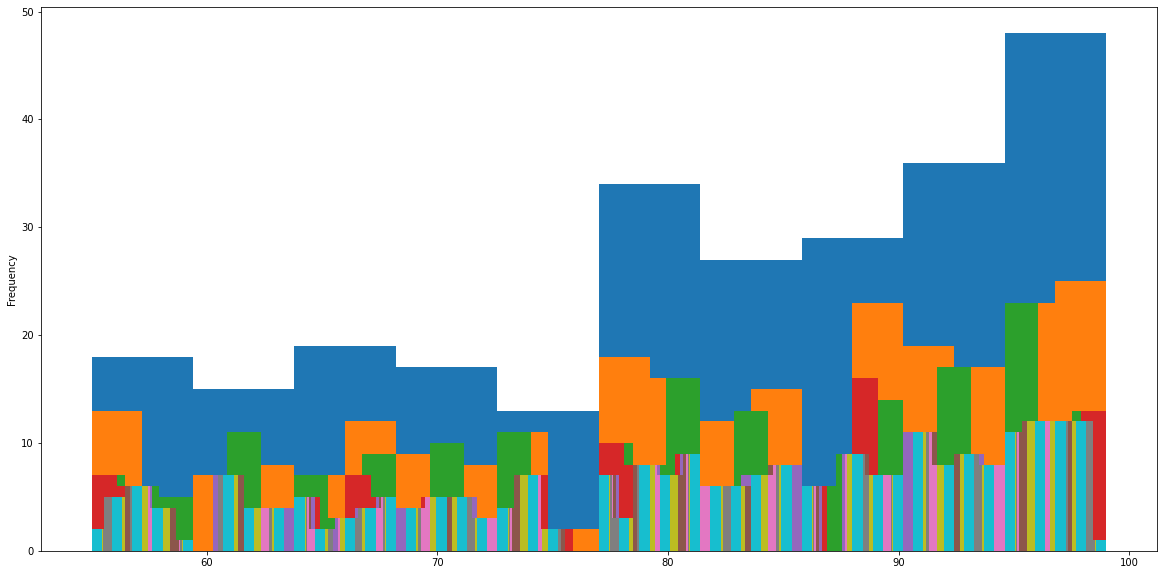

In [ ]:
for x in range(10,101,10):
  df['user rating score'].plot.hist(bins=x, figsize = (20,10))

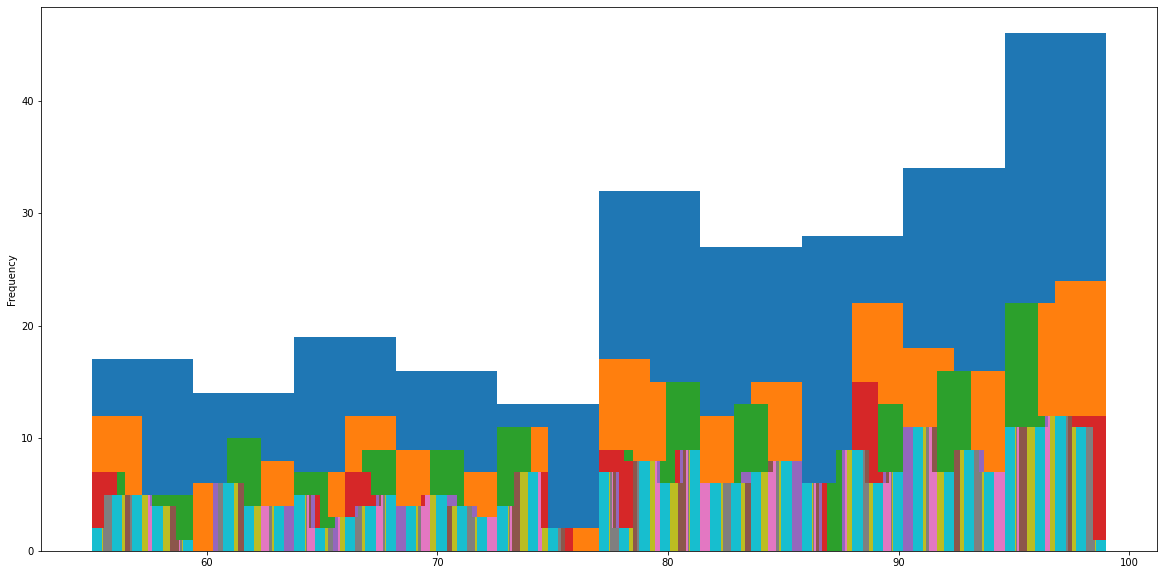

In [ ]:
for x in range(10,101,10):
  df1['user rating score'].plot.hist(bins=x, figsize = (20,10))

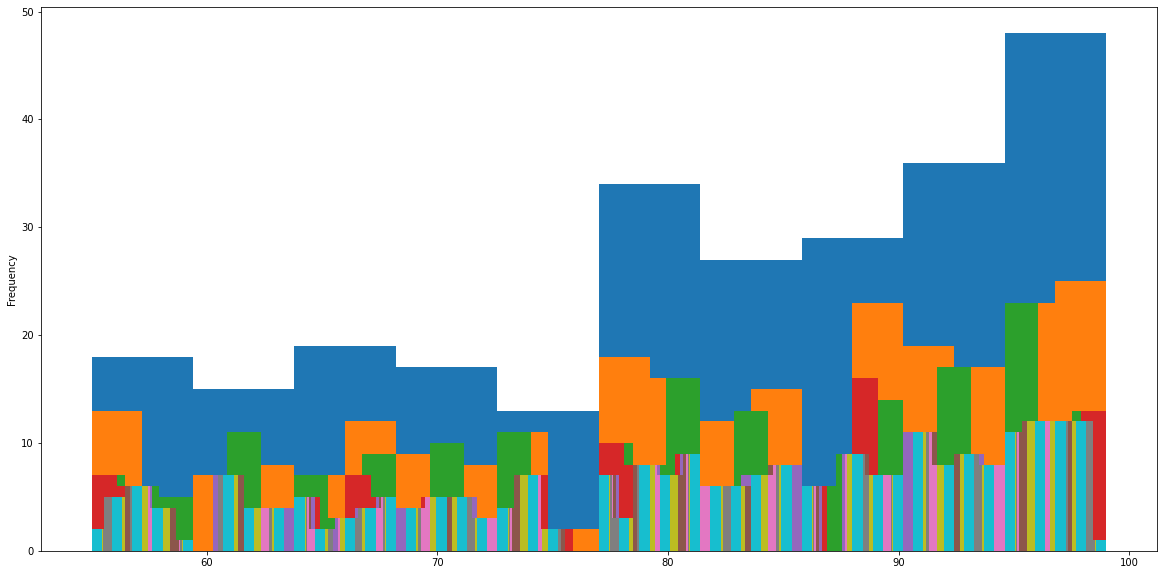

In [ ]:
for x in range(10,101,10):
  df2['user rating score'].plot.hist(bins=x, figsize = (20,10))

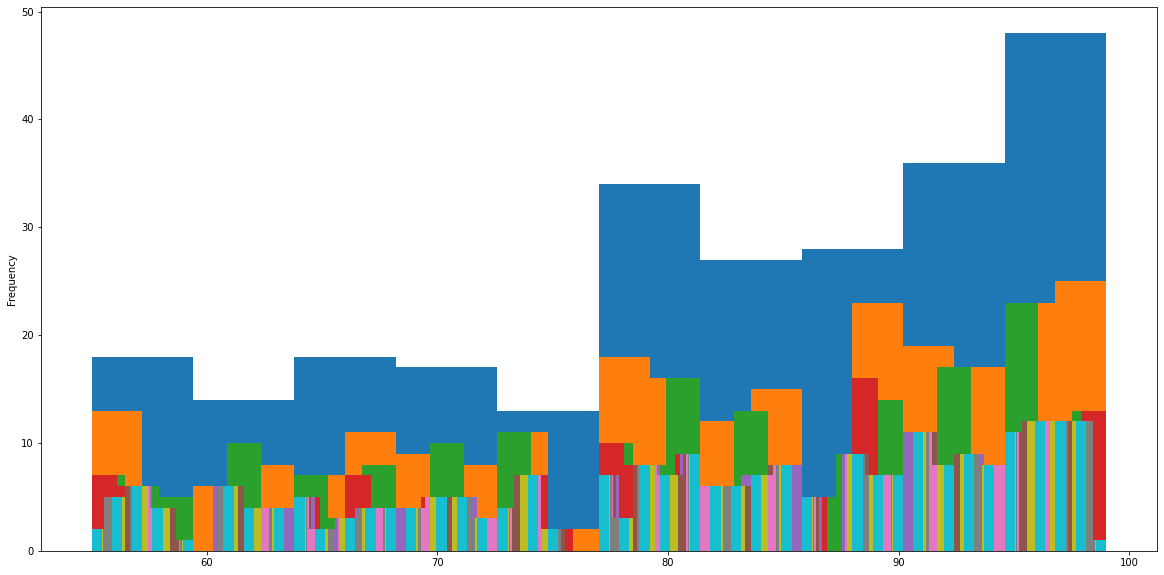

In [ ]:
for x in range(10,101,10):
  df3['user rating score'].plot.hist(bins=x, figsize = (20,10))

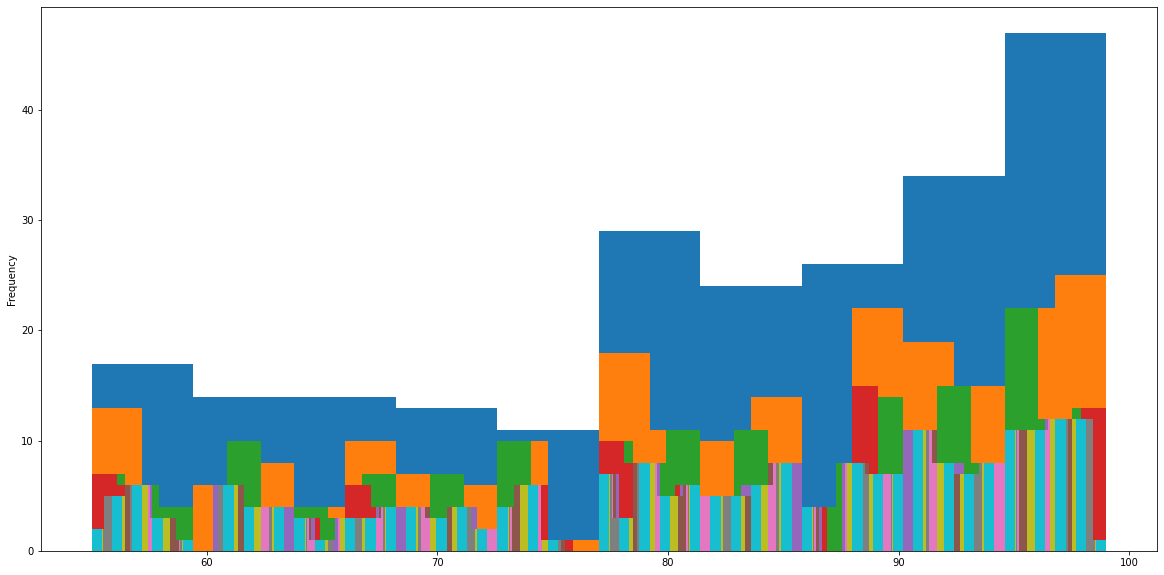

In [ ]:
for x in range(10,101,10):
  df4['user rating score'].plot.hist(bins=x, figsize = (20,10))

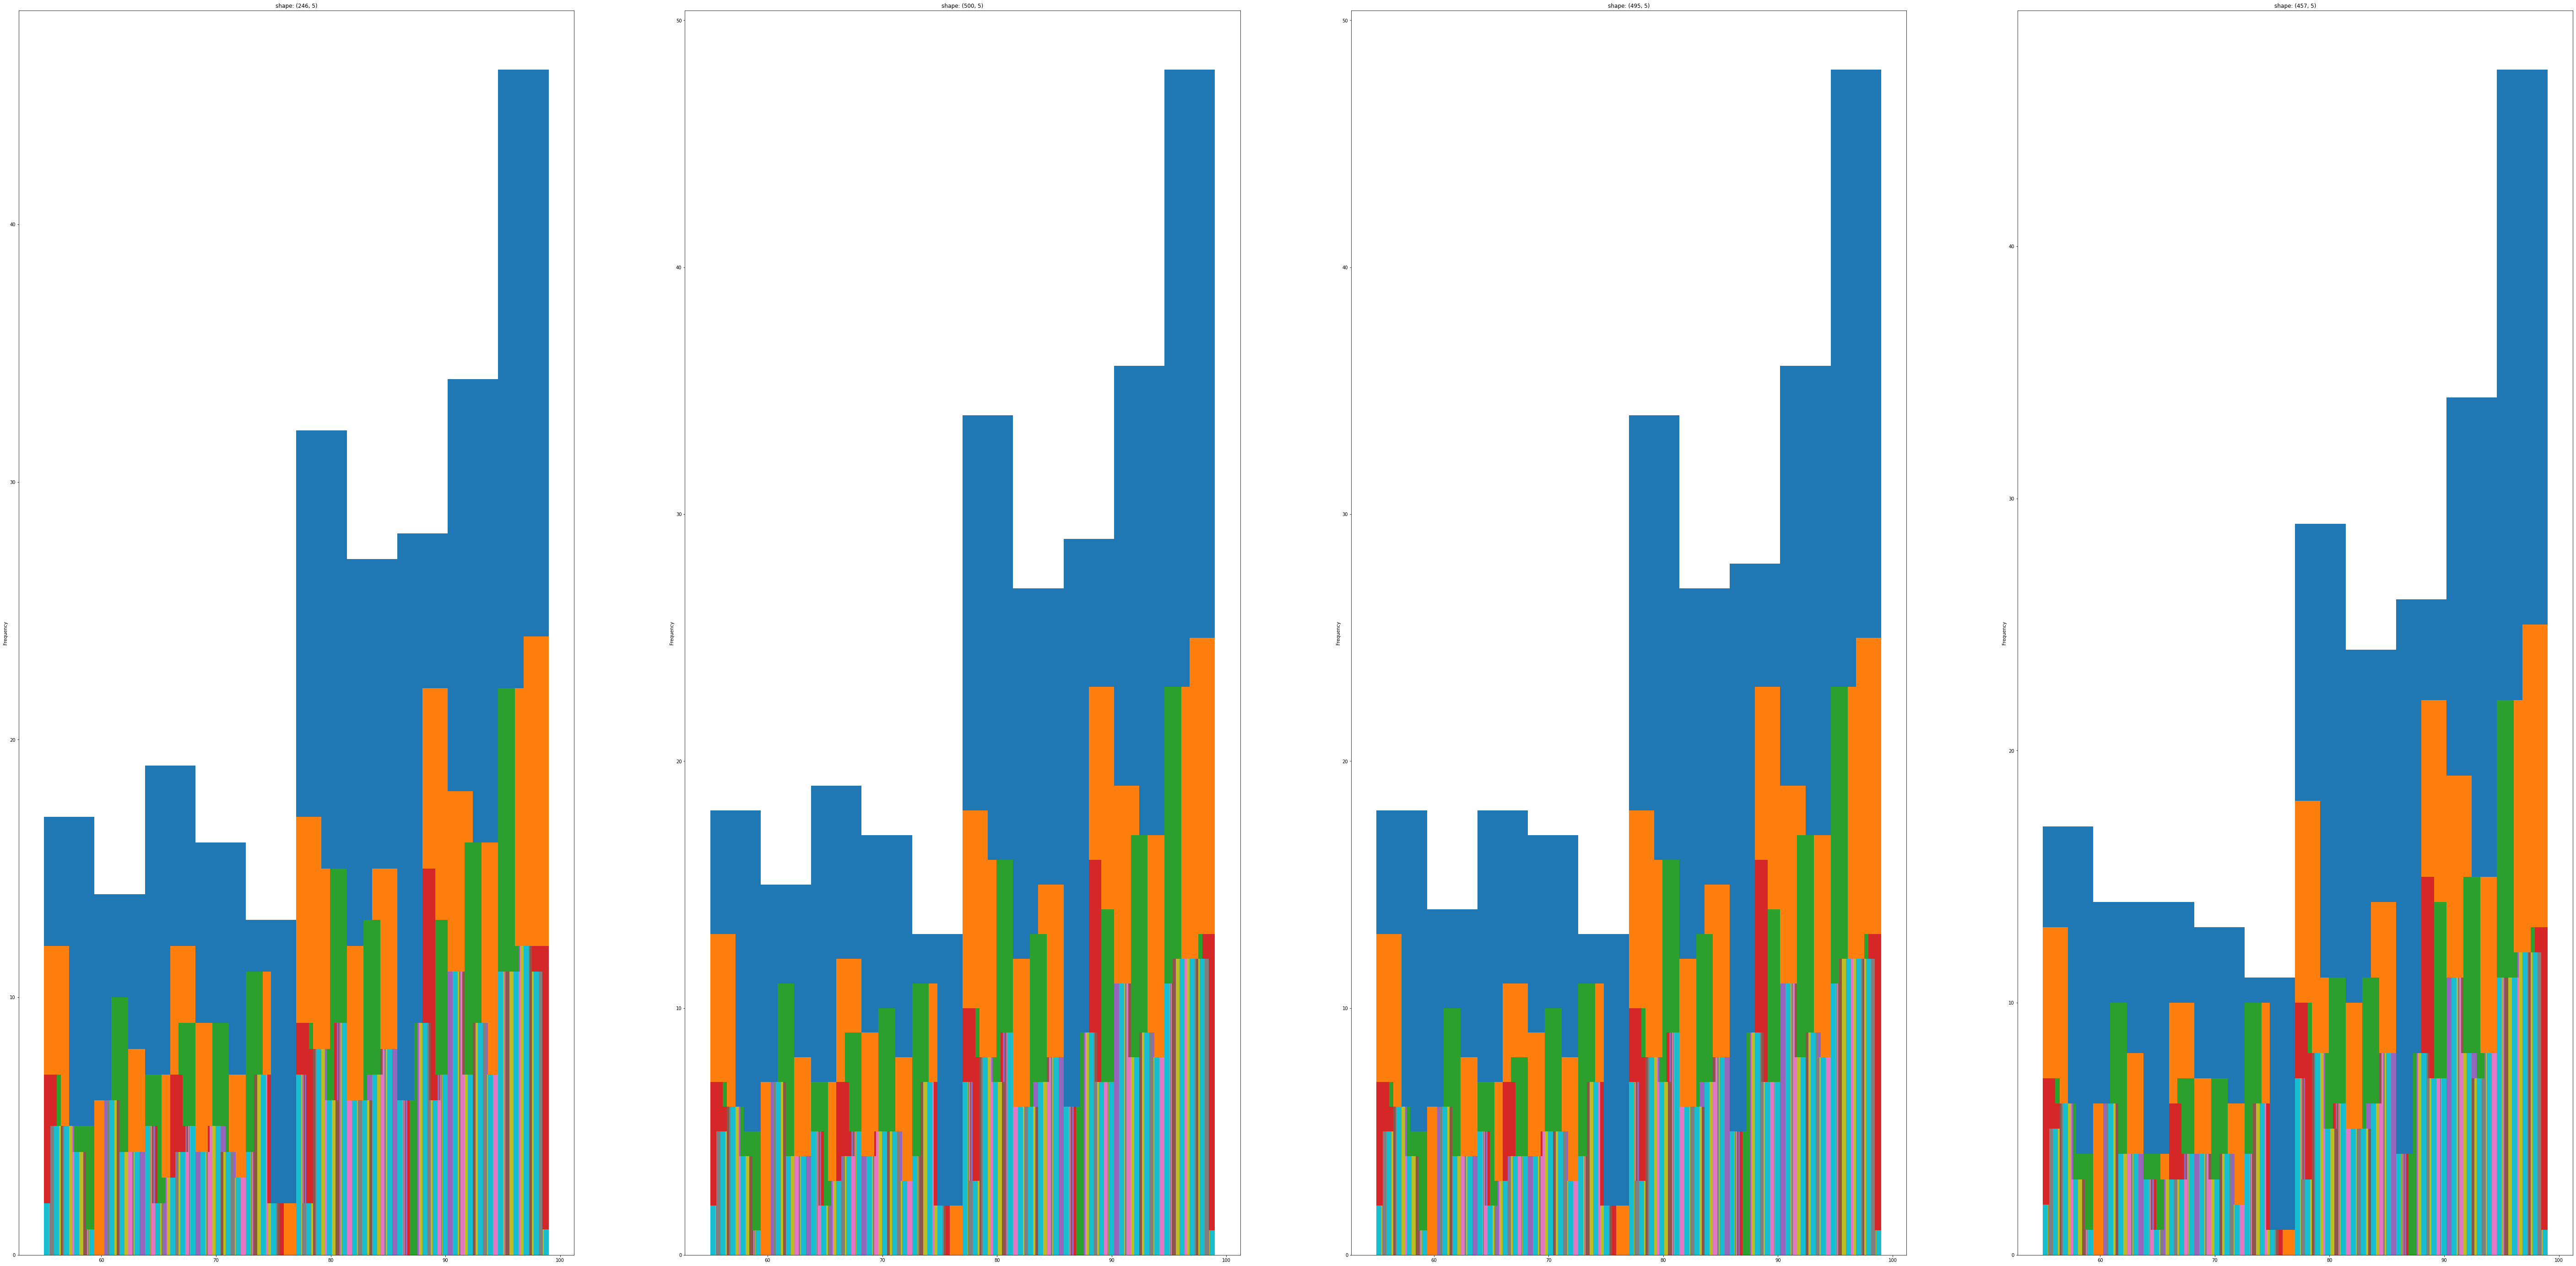

In [ ]:
#для наглядности сделаем то же самое но в одной фигуре
fig, axs = plt.subplots(1, 4, figsize=(100, 50))
axs[0].set_title('shape: '+str(df1.shape))
axs[1].set_title('shape: '+str(df2.shape))
axs[2].set_title('shape: '+str(df3.shape))
axs[3].set_title('shape: '+str(df4.shape))
for x in range(10,101,10):
  df1['user rating score'].plot.hist(bins=x, ax = axs[0])  
  df2['user rating score'].plot.hist(bins=x, ax = axs[1])
  df3['user rating score'].plot.hist(bins=x, ax = axs[2])
  df4['user rating score'].plot.hist(bins=x, ax = axs[3])
  


### Выведите основную информацию об оценках пользователей
- Чему равны среднее, стандартное отклонение, минимум, максимум, медиана? 
- Отличаются ли медиана и среднее? 
- Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
#смотрим сатистику по датасету с убраными дублями
df['user rating score'].describe()

count    256.000000
mean      81.398438
std       12.730904
min       55.000000
25%       71.000000
50%       83.500000
75%       93.000000
max       99.000000
Name: user rating score, dtype: float64

In [ ]:
#сравним количество пустых ячеек юзер рейтинга в каждом датасете
dfs=[df,df1,df2,df3,df4]

for x in range(len(dfs)):
  print(f'None values in df{x}: {sum(dfs[x]["user rating score"].isna())}')

NameError: ignored

In [ ]:
#максимальный год
s=df['release year'].max()

NameError: ignored

In [ ]:
#lets try clustering
# Пробуем кластеризацию. Сперва отрисуем все точки датасета(1998-2017) на скеттерплон

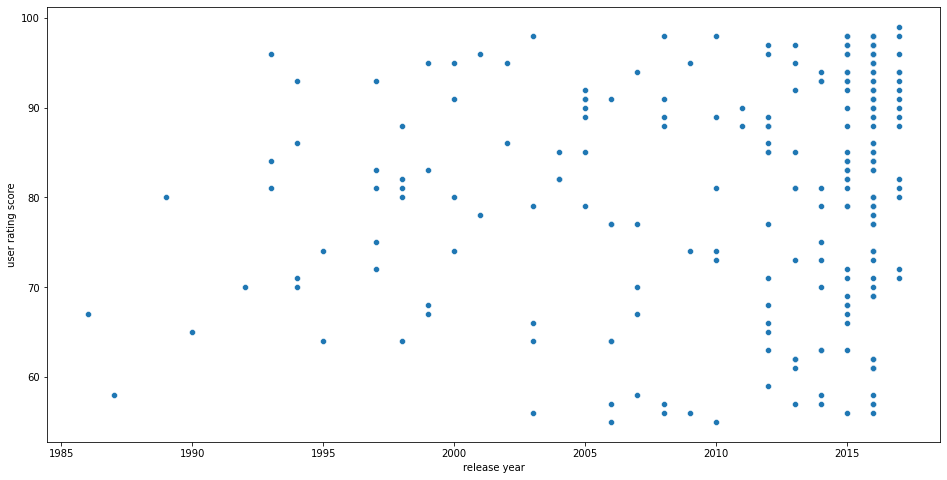

In [ ]:
plt.figure(figsize = (16,8))

sns.scatterplot(x = df3['release year'], y= df3['user rating score'])
plt.show()

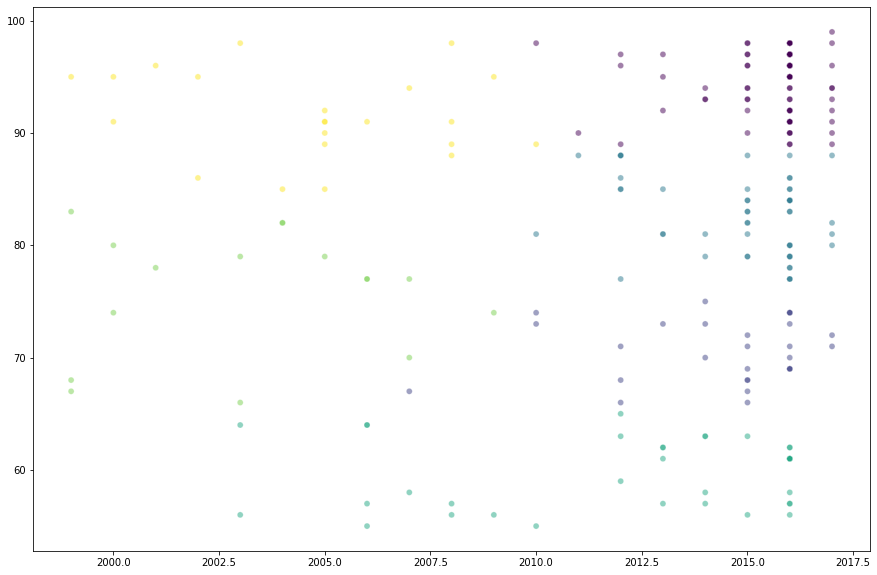

In [ ]:
#использую KMeans постараемся разбить на класетеры
plt.figure(figsize = (15,10))
to_cluster = df4[['release year', 'user rating score']].dropna(subset=['user rating score']).values
cluster_num = 6
kmeans = KMeans(n_clusters = cluster_num)
kmeans.fit(to_cluster)
labels = kmeans.labels_
#plt.scatter(to_cluster[:,0], to_cluster[:,1], c = labels)

sns.scatterplot(x = to_cluster[:,0], y= to_cluster[:,1], c= labels, alpha = 0.5)
plt.show()

In [ ]:
'''Как видим - никакой кластеризации нормальной - при 6 кластерах выделяется:
1. кластер с плохими оценками по всем годам
2. кластер средних (до83) оценок фильмов до 2009
3. кластер средних (65-78) оценок фильмов с 2009
4. кластер средних (78-88) оценок фильмо с 2009
5. кластер высоких оценок фильмов до 2010
6. кластер высоких оценок фильмов с 2010'''

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


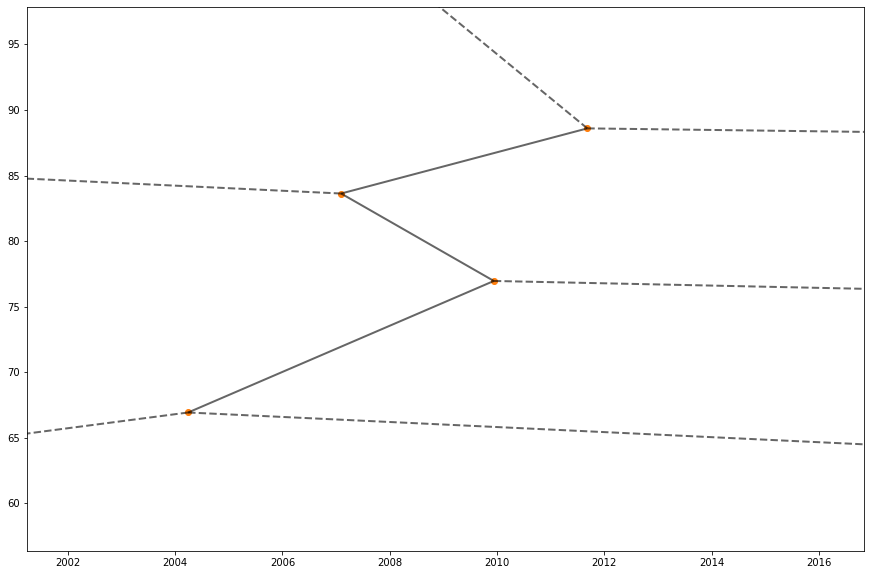

In [ ]:
#Попробуем разбить эти сегменты с помощью Voronoi контуров чтоб увидеть границы
plt.figure(figsize = (15,10))
to_cluster = df4[['release year', 'user rating score']].dropna(subset=['user rating score'])
cluster_num = 6
kmeans = KMeans(n_clusters = cluster_num)
kmeans.fit(to_cluster)

vor = Voronoi(kmeans.cluster_centers_)
voronoi_plot_2d(vor, show_verices = False, line_color='gray', line_width=2, line_alpha=0.6, point_size=0, ax=plt.gca())

#contour_plot
x = np.linspace(to_cluster['user rating score'].min(), to_cluster['user rating score'].max(), 100)
y = np.linspace(to_cluster['release year'].min(), to_cluster['release year'].max(), 100)
X, Y = np.meshgrid(x, y)

Z = kmeans.predict(np.column_stack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.contourf(X, Y, Z, alpha=0.2, cmap='viridis')
plt.show()

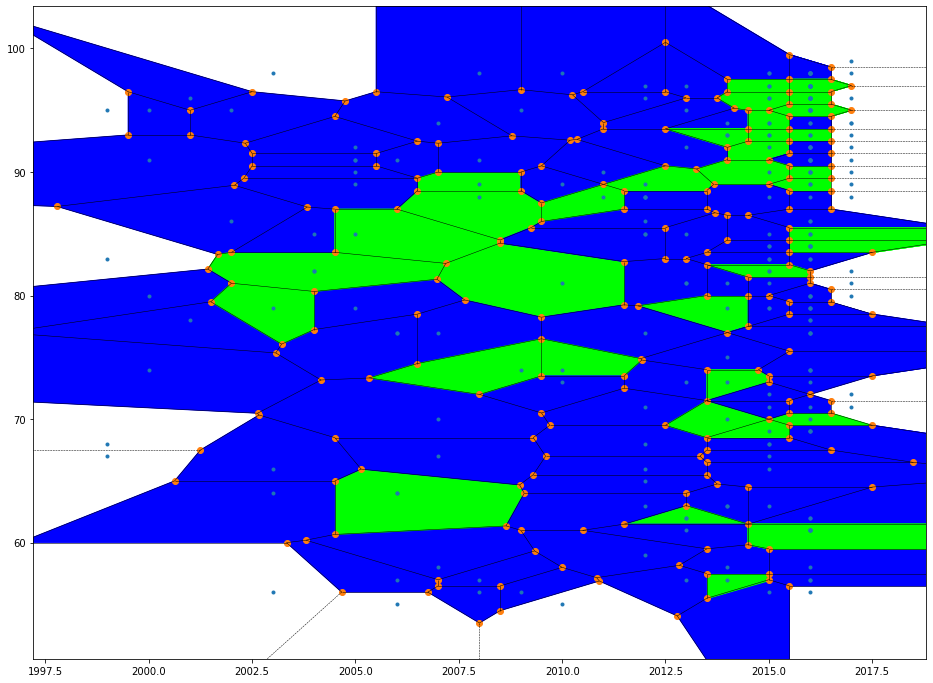

In [ ]:
#попробуем сделать заливку разными цветами - FAIL
fig,ax = plt.subplots(figsize = (16,12))
to_cluster = df4[['release year','user rating score']].dropna(subset=['user rating score'])
colors = [(x,y,z) for x in range(2) for y in range(2) for z in range(2)][1:3]

X = to_cluster.values
kmeans = KMeans(n_clusters = len(colors)).fit(X)
labels = kmeans.labels_

vor = Voronoi(X)
cluster_label = labels[vor.point_region]
voronoi_plot_2d(vor, ax = ax, show_verices=False, line_color='gray', line_width = 0.5)

for region_index, color_index in zip(vor.point_region, cluster_label):
  vertices = vor.regions[region_index]
  if all(v >= 0 for v in vertices):
    ax.fill(vor.vertices[vertices,0],vor.vertices[vertices, 1], color=colors[color_index])


plt.show()

In [ ]:
#С использованием кластеризации kmeans и контуров Voronoi явно херня какая-то вышла короче

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


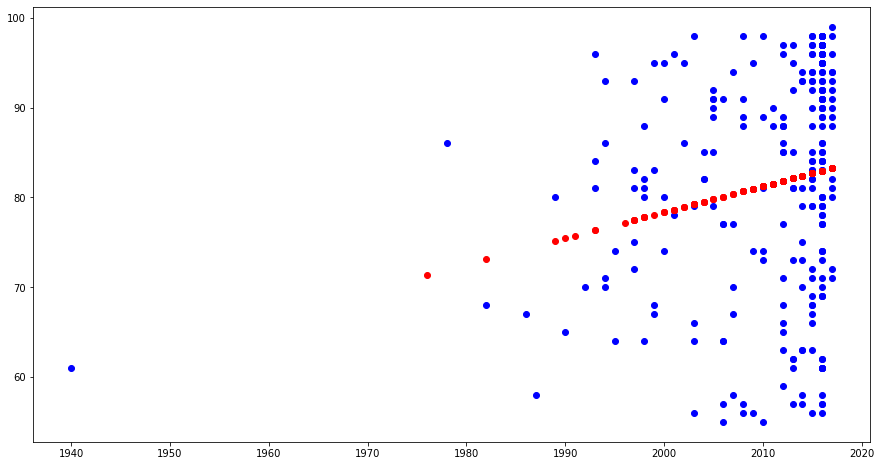

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


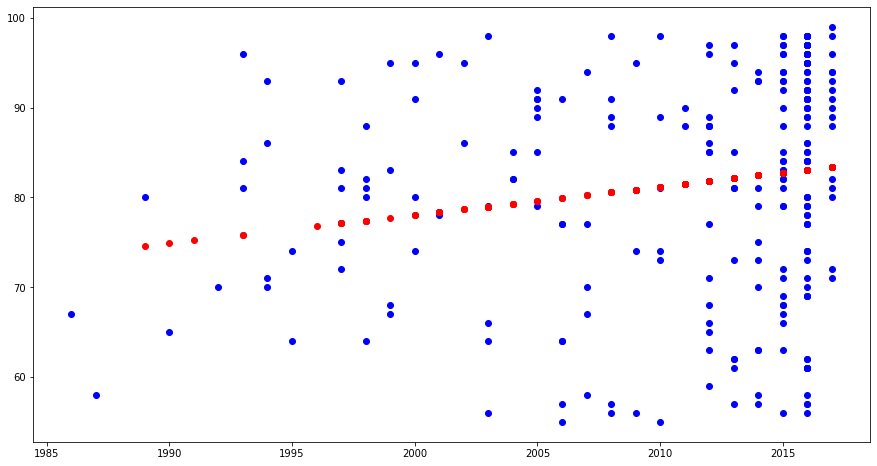

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


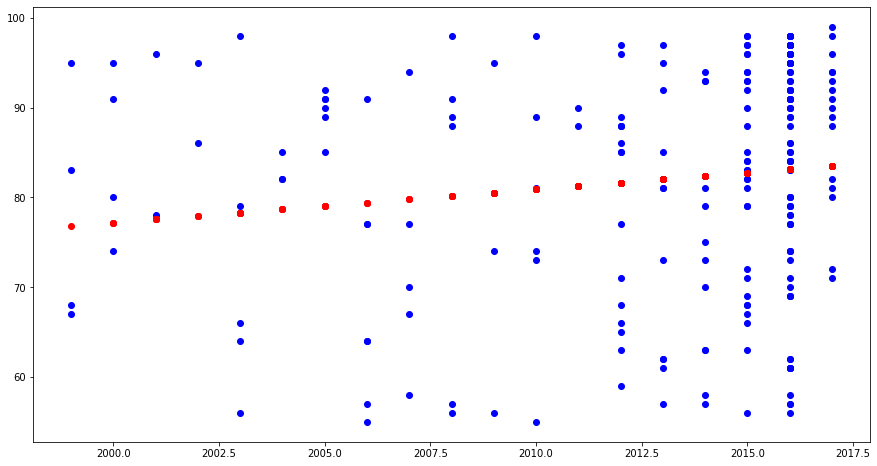

In [ ]:
#what about prediction? as we can see the slope of the line in slighly positive. remember  - correlation is about 20%
#Построим линейную регрессию для трех разных видов датасетов - с 1940го, с 1985го и с 1998го

dfs = [df2,df3,df4]
for d in range(len(dfs)):
  to_linear = dfs[d][['release year', 'user rating score']]

  train_data = to_linear.dropna(subset = ['user rating score'])
  test_data = to_linear[to_linear['user rating score'].isna()]

  X_train = train_data['release year'].values.reshape(-1,1)
  y_train = train_data['user rating score'].values.reshape(-1,1)
  regression = LinearRegression()
  regression.fit(X_train, y_train)

  X_test = test_data['release year'].values.reshape(-1,1)
  y_pred = regression.predict(X_test)

  to_linear.loc[to_linear['user rating score'].isna(), 'user rating score'] = y_pred.reshape(-1)

  
  plt.figure(figsize=(15,8))
  plt.scatter(train_data['release year'], train_data['user rating score'], color = 'blue')
  plt.scatter(test_data['release year'], y_pred, color = 'red')
  plt.show()

In [ ]:
#На графике видим редние значения по годам по сути и слегка позитивный рост рейтингов. Сравним графики можно заметить, что оверфиттинга нет даже учитывая выброс в 1940г
#и наклон касательной около 20%, находится на каждом графике около одних и тех же значений

In [ ]:
#Заполним пустые значения средним по году (как же это бессмысленно) и выведем те, что больше не пустые
df5 = df4.copy()
find_year_means = df5.groupby('release year')['user rating score'].transform('mean')
#find_year_means.describe()

df5['user rating score'] = df5['user rating score'].fillna(find_year_means).astype(np.int32)
df5[df4.isna().any(axis=1)]['user rating score'].count()

title                238
rating               238
ratingLevel          205
release year         238
user rating score    238
dtype: int64

<AxesSubplot:xlabel='release year', ylabel='user rating score'>

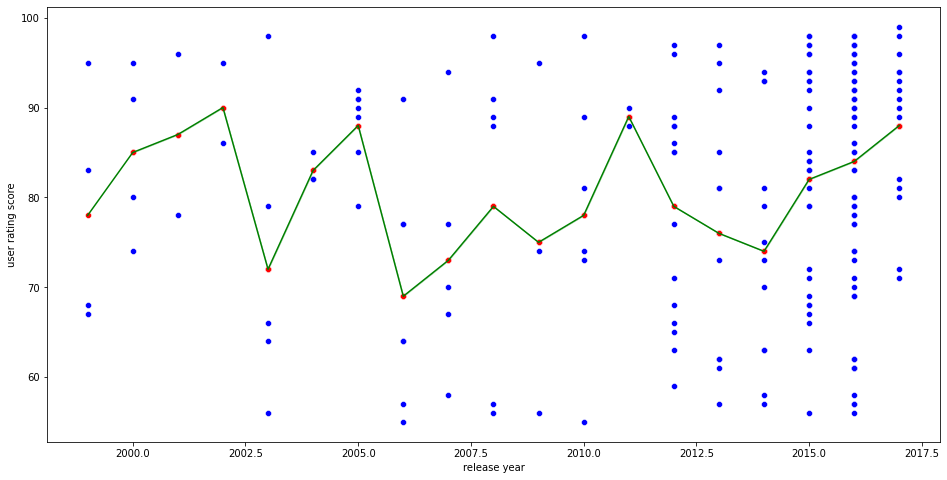

In [ ]:
#Отразим на графике заполненные средним за год пустые значения
plt.figure(figsize = (16,8))
sns.scatterplot(x='release year', y = 'user rating score', data=df4, color='blue')                             #датасет с наличием пустых ячеек
df6 = df5[['release year','user rating score']][df4[['release year','user rating score']].isna().any(axis=1)]  #датасет с разницей между датасетами с заполненным и незаполненными графами
sns.lineplot(data=df6,x='release year', y='user rating score',estimator='max', color='green')                  #линии по заполненным средним ячейкам
sns.scatterplot(x='release year', y = 'user rating score', data=df6, color = 'red')                            #заполненые средним пустые ячейки


In [ ]:
#Исходя из того как много пустых значений в 2017 году (1\3), возможно имеет смысл размечать до 2016 года, а к 2017 особый подход использовать?

### В какие годы были запущены шоу, представленные в датасете?

In [ ]:
#Отрисуем гистограмму и боксплот для 4 датасетов (дроп дубликатов, дроп URS&RL, c1985, с 1998) выхода фильмов по годам

In [ ]:
def get_bins(dataset, title):
  return dataset[title].max()-dataset[title].min()

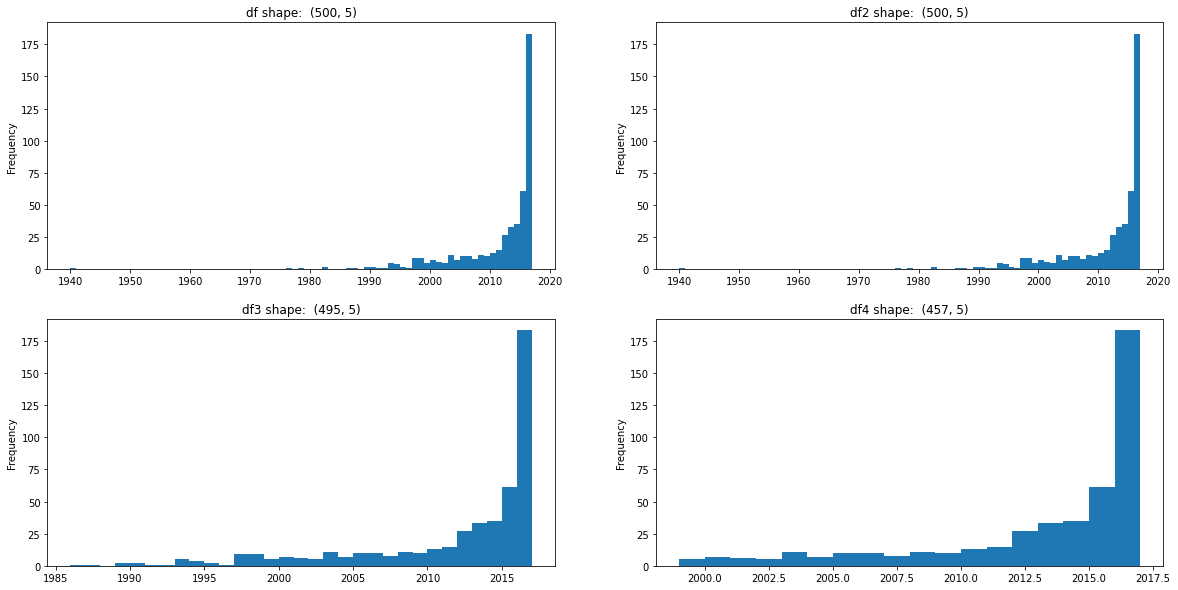

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
study = 'release year'
datasets = [df,df2,df3,df4]
dfnames = ['df','df2','df3','df4']


for x in range(len(datasets)):
  num = (0,x) if x < 2 else (1,x-2) 
  axs[num].set_title(f'{dfnames[x]} shape:  {str(datasets[x].shape)}')
  datasets[x][study].plot.hist(bins = get_bins(datasets[x], study), ax=axs[num]) 



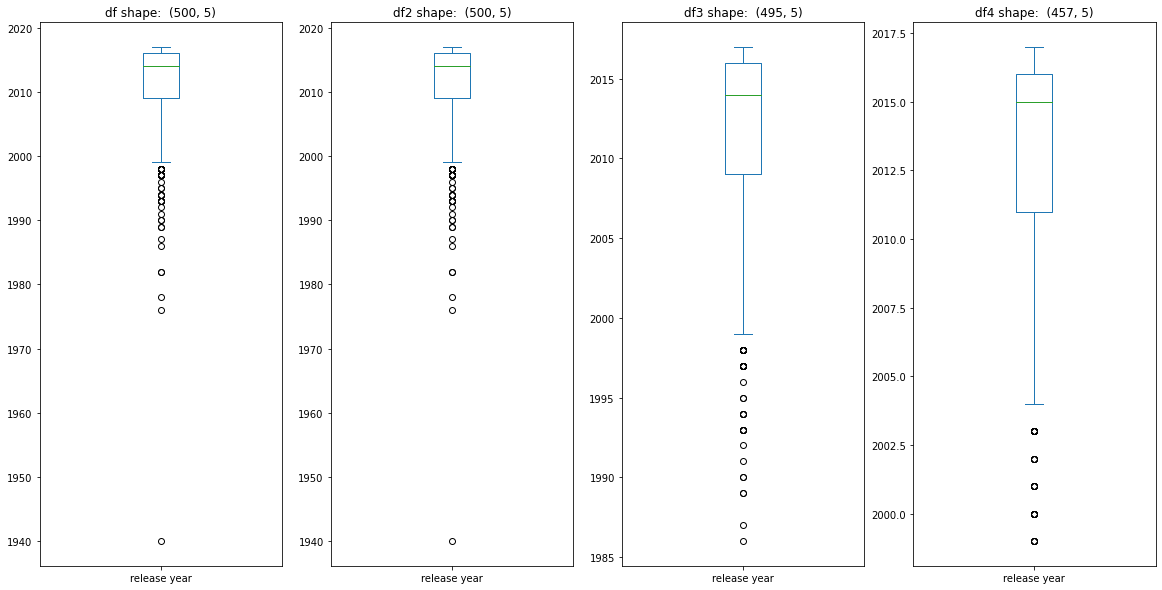

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20,10))
for x in range(len(datasets)):
  axs[x].set_title(f'{dfnames[x]} shape:  {str(datasets[x].shape)}')
  datasets[x][study].plot.box(ax=axs[x])  

### Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. 

- Наблюдается ли рост? 
- Есть ли выбросы?
- Что из себя представляют выбросы?
- Чем могут быть они вызваны?

In [ ]:
#1. наблюдается рост после 2010 и интесивный рост после 2015 с пиком в 2017. Года, отсутствующие в таблице (1940-2017) - 43, года присутствующие - 35.
#2-3. выбросами можно считать все ниже 1998 (34 значения и отбраковки дубликатов) или 1985 (5 значений). 
#4.Нетфликс не существовал до 1997го и запуска стриминга в 2007, но некоторые фильмы снятые раннее этого времени были выкуплены Нетфликсом. 
#Поскольку старые фильмы не сильно интересуют публику, права только на редкие фильмы выкупались. Это и сформировало выброс 


In [ ]:
ilist = [x for x in range(df['release year'].min(), df['release year'].max()+1)]

In [ ]:
#посмотрим в какие годы выходили фильмы
in_df_years = [x for x in ilist if x  in df2['release year'].values]
print(in_df_years)
print()
print("Всего",len(in_df_years))

[1940, 1976, 1978, 1982, 1986, 1987, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

Всего 35


In [ ]:
#посмотрим в какие годы фильмы не выходили
not_in_df_years = [x for x in ilist if x not in df2['release year'].values]
print(not_in_df_years)
print()
print("всего", len(not_in_df_years))

[1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1977, 1979, 1980, 1981, 1983, 1984, 1985, 1988]

всего 43


<AxesSubplot:>

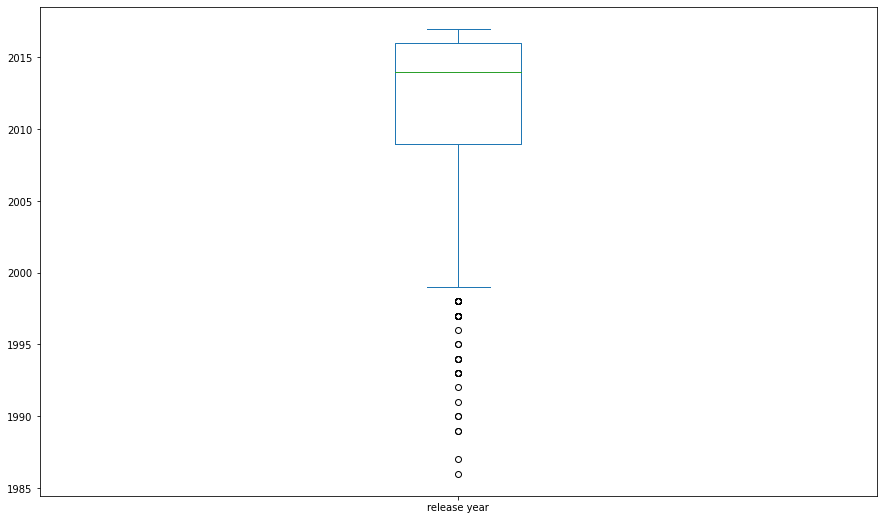

In [ ]:

df3['release year'].plot.box(figsize = (15,9))

In [ ]:
#посмотрим фильмы ниже порога в 1985год
df2.loc[(df['release year'] <= treshold)]

,title,rating,ratingLevel,release year,user rating score
252,Grease,PG,Parental guidance suggested. May not be suitab...,1978,86.0
506,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
658,Annie,PG,adult content and mld violence,1982,68.0
761,Fantasia,G,General Audiences. Suitable for all ages.,1940,61.0
772,The Last Unicorn,G,General Audiences. Suitable for all ages.,1982,NaN


In [ ]:
#фильмы ниже порога в 1998год
df2.loc[(df['release year'] <= treshold2)]

,title,rating,ratingLevel,release year,user rating score
250,The Waterboy,PG-13,language and some crude sexual humor,1998,82.0
252,Grease,PG,Parental guidance suggested. May not be suitab...,1978,86.0
500,The Nightmare Before Christmas,PG,some scary images,1993,84.0
506,The Smurfs and the Magic Flute,G,General Audiences. Suitable for all ages.,1976,NaN
507,We're Back! A Dinosaur's Story,G,General Audiences. Suitable for all ages.,1993,NaN
519,The Super Mario Bros. Super Show!,TV-Y7,Suitable for children ages 7 and older,1989,NaN
520,Power Rangers Zeo,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,1996,NaN
563,Ninja Turtles: The Next Mutation,TV-Y7-FV,Suitable for children ages 7 and older. Conte...,1997,NaN
568,Goosebumps,TV-Y7,Suitable for children ages 7 and older,1998,88.0
600,The Little Rascals,PG,some rude dialogue,1994,86.0


In [ ]:
#ВНИМАНИЕ: Касаемо пустых данных. датасет до 2017. Это может подразмевать, что не все оценки фильмам 2017 еще выставлены
#Сравним разницу в 2016 и 2017 если дропать ряды где юзер рейтинг И рейтинг левел пусты
#порядка 10 из 37 в 2017 года это очень много, не стоит дропать мне кажется
#поэтому пока что делаем df2=df. возможно стоит заполнить пустые значения чем-то
for year in [2016,2017]:
  df_year = sum(df['release year'] == year)
  df2_year = sum(df3['release year'] == year)
  diff =  df_year - df2_year
  print(f'Разница в {year} без оценок: {diff} из {df_year} это {round(diff/df_year*100,2)}% - c удаленным дублями')
  print(f'Разница в {year} без оценок: {diff} из {df2_year} это {round(diff/df2_year*100,2)}% - c удаленным дублями и rs&rl')
  print()

Разница в 2016 без оценок: 0 из 146 это 0.0% - c удаленным дублями
Разница в 2016 без оценок: 0 из 146 это 0.0% - c удаленным дублями и rs&rl

Разница в 2017 без оценок: 0 из 37 это 0.0% - c удаленным дублями
Разница в 2017 без оценок: 0 из 37 это 0.0% - c удаленным дублями и rs&rl



In [ ]:
#КЛЮЧЕВОЙ ВОПРОС - будем ли заполнять пустые значения. И чем?

### Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. 
- Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки) 
- Как еще можно оценить "Успешность"? 



In [ ]:
#смотрим чисельную статистику по 2016 и 2017 годам юзер рейтинга
years = [2016, 2017]
for year in years:
  print('Year:', year)
  #print(round(df2[df2['release year'] == year]['user rating score'].mean(),2))
  print(df2[df2['release year'] == year]['user rating score'].describe())

Year: 2016
count    86.000000
mean     84.313953
std      12.599030
min      56.000000
25%      77.000000
50%      89.000000
75%      95.000000
max      98.000000
Name: user rating score, dtype: float64
Year: 2017
count    16.000000
mean     88.125000
std       8.585841
min      71.000000
25%      81.750000
50%      90.500000
75%      94.000000
max      99.000000
Name: user rating score, dtype: float64


In [ ]:
#печатаем разницу значений
future_text_2016 = str(df2[df2['release year'] == 2016]['user rating score'].describe().apply(lambda x: round(x,2))).split()
future_text_2017 = str(df2[df2['release year'] == 2017]['user rating score'].describe().apply(lambda x: round(x,2))).split()

print('name   2016          2017')
for x in range(0,len(future_text_2016[:-7]),2):
  f16 = future_text_2016[x+1]
  f17 = future_text_2017[x+1]
  print(f'{future_text_2016[x]}: {f16} vs {f17} разница {round(float(f16)-float(f17),2)}')

name   2016          2017
count: 86.00 vs 16.00 разница 70.0
mean: 84.31 vs 88.12 разница -3.81
std: 12.60 vs 8.59 разница 4.01
min: 56.00 vs 71.00 разница -15.0
25%: 77.00 vs 81.75 разница -4.75
50%: 89.00 vs 90.50 разница -1.5
75%: 95.00 vs 94.00 разница 1.0
max: 98.00 vs 99.00 разница -1.0


In [ ]:
#для наглядности лучше объеинить это в один датафрейм и сравнить
s1 = [future_text_2016[x] for x in range(len(future_text_2016[:-6])) if not x % 2]
s2 = [future_text_2016[x] for x in range(len(future_text_2016[:-6])) if x % 2]
s3 = [future_text_2017[x] for x in range(len(future_text_2017[:-6])) if  x % 2]
s4  =[float(s2[x])-float(s3[x]) for x in range(len(s2))]
d = pd.DataFrame({'2016':s2, '2017':s3,'diff':s4}, index = s1)
d

,2016,2017,diff
count,86.00,16.00,70.00
mean,84.31,88.12,-3.81
std,12.60,8.59,4.01
min,56.00,71.00,-15.00
25%,77.00,81.75,-4.75
50%,89.00,90.50,-1.50
75%,95.00,94.00,1.00
max,98.00,99.00,-1.00


In [ ]:
# Посмотрим на разницу интерквартального ренджа между 2016 и 2017. как видим изза небольшого количества данных в 2017 и IQR меньше, причем на треть
years = ['2016','2017']
nrow = {}
for year in years:
  nrow[year] = d[year].astype(float)['75%'] - d[year].astype(float)['25%']
nrow['diff'] = nrow['2016'] - nrow['2017']
nrow = pd.DataFrame(nrow, index = ['IRQ'])
d.append(nrow)



,2016,2017,diff
count,86.00,16.00,70.00
mean,84.31,88.12,-3.81
std,12.60,8.59,4.01
min,56.00,71.00,-15.00
25%,77.00,81.75,-4.75
50%,89.00,90.50,-1.50
75%,95.00,94.00,1.00
max,98.00,99.00,-1.00
IRQ,18.0,12.25,5.75


In [ ]:
#Как видим большая разница в количестве фильма, в 2017 чуть выше среднее и ниже std, худший фильм в 2016 получил рейтинг 56, а в 2017 - 71. 
#При этом медиана отличается на 1.5, mean на 3.81, а рендж на 1\3

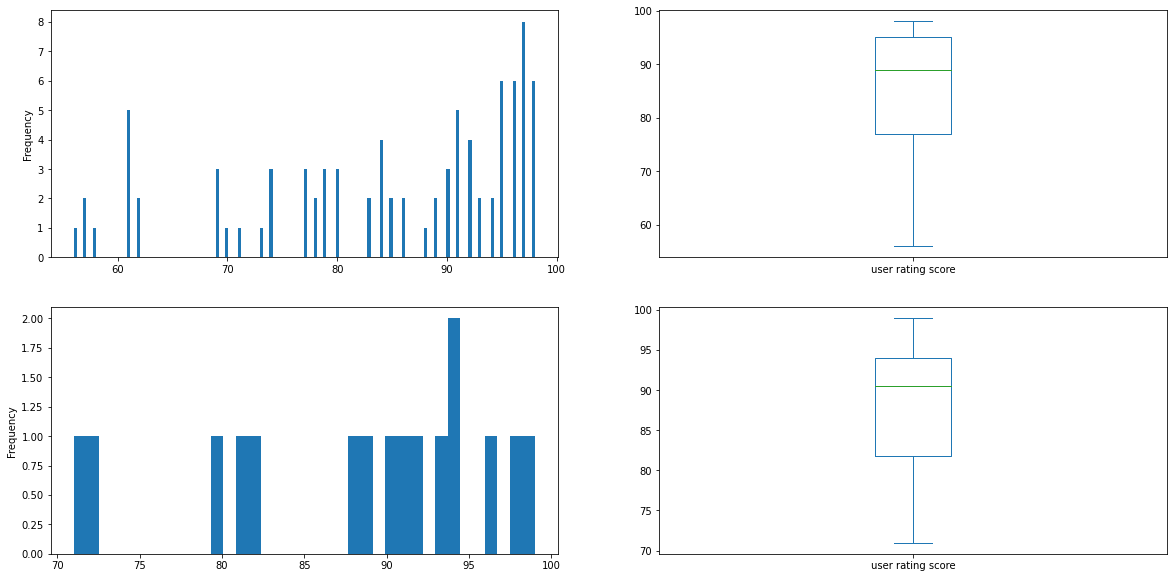

In [ ]:
#сравним гистограмму и боксплот 2016 и 2017 года. пустые значения не дропались. 
#PS: axs[0,1] axs[1,1]   .set_ylabel работает, а вот с 0,0 и 0,1 почему-то не переименовываются. ось у - количество оценок 
years = [2016,2017]
fig, axs = plt.subplots(2, 2, figsize=(20,10))

for year in range(len(years)):
  mydf = df4[df4['release year'] == years[year]]['user rating score']  
  mydf.plot.hist(bins = mydf.shape[0], ax = axs[year, 0])
  mydf.plot.box(ax = axs[year, 1])

In [ ]:
#Как мы видим среднее значение в 2017 году было выше, но и фильмов было меньше. можно также успешность оценить по медиане и среднеквадратичному отклонению.
#в 2017 и медиана и среднее значение выше, среднеквадратичное отклонение меньше и iqr. меньше

### Как нагляднее будет показать распределение пользователям по рейтинговым группам?

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

In [ ]:
...

Ellipsis

### Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) 
Аналитики и Data Scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

In [ ]:
...

Ellipsis